In [ ]:
import numpy as np
np.set_printoptions(precision=3,linewidth=1000,suppress=True,threshold=10**8)

In [ ]:
#batch_size=128 #B
block_size=256 #T
n_embd=128 #C
n_head=4
head_size=n_embd//n_head
n_layer=4
eps=1e-5 #for layer normalization

In [ ]:
#load Shakespeare.txt to Colab
with open('Shakespeare.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [ ]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))

In [ ]:
vocab_size = len(chars)
vocab_size

65

In [ ]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
#and from integers to characters
itos = { i:ch for i,ch in enumerate(chars) }

In [ ]:
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

In [ ]:
x=np.array([encode('to be or not to b')])

print(x)
print()
print(x.shape)

[[58 53  1 40 43  1 53 56  1 52 53 58  1 58 53  1 40]]

(1, 17)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
token_embedding_table=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/token_embedding_table.weight.txt')

print(token_embedding_table)
print()
print(token_embedding_table.shape)

[[-0.055  0.018 -0.187  0.215  0.067  0.012 -0.046 -0.283  0.098 -0.06   0.159  0.047  0.086 -0.001 -0.089 -0.068 -0.004 -0.032  0.007 -0.009  0.066 -0.027 -0.02  -0.031 -0.081 -0.132 -0.011  0.002 -0.183  0.003 -0.095  0.032  0.084 -0.043 -0.04   0.047  0.014 -0.027 -0.256 -0.112  0.071 -0.133 -0.003  0.006 -0.042  0.043 -0.014  0.301  0.015 -0.006  0.126  0.153  0.14   0.299  0.004 -0.067  0.102  0.046  0.015  0.095  0.07   0.02  -0.119 -0.017 -0.011 -0.093  0.083 -0.033 -0.056 -0.163 -0.046  0.134  0.052  0.038  0.055  0.104 -0.018  0.114 -0.036 -0.101  0.081  0.043  0.074  0.006 -0.039  0.002 -0.01   0.172 -0.014  0.088 -0.017 -0.091 -0.038  0.007 -0.041 -0.032 -0.022 -0.028 -0.014 -0.039 -0.126  0.02  -0.149 -0.061  0.01  -0.035  0.258  0.068 -0.011  0.062  0.213 -0.015  0.04  -0.095 -0.038 -0.024  0.055 -0.057 -0.034  0.111  0.026 -0.14   0.061 -0.    -0.008  0.011  0.095 -0.14 ]
 [-0.093  0.181 -0.075 -0.021  0.079 -0.081 -0.087 -0.12   0.043 -0.231 -0.001  0.029  0.028 -0.015  

In [ ]:
Token_Embed=token_embedding_table[x[0],:]

print(Token_Embed)
print()
print(Token_Embed.shape)


[[-0.022 -0.268  0.198 -0.031 -0.111  0.103 -0.219  0.159  0.076  0.24  -0.083  0.048 -0.053  0.076  0.123  0.006 -0.012  0.148 -0.102 -0.042 -0.06  -0.009  0.098 -0.022 -0.005 -0.037 -0.037  0.036 -0.034 -0.107 -0.017  0.026 -0.072  0.088 -0.003  0.076  0.05  -0.047  0.012 -0.068  0.035  0.123 -0.056 -0.073  0.083 -0.06  -0.007  0.126 -0.044  0.085  0.17  -0.121 -0.091  0.076  0.021  0.094 -0.048 -0.083 -0.055  0.016 -0.017  0.015  0.056  0.207  0.053  0.015 -0.055  0.039  0.004 -0.114  0.013 -0.06   0.266  0.071 -0.025 -0.019 -0.057  0.016  0.025 -0.145  0.028 -0.005 -0.16   0.206 -0.041  0.021 -0.021  0.209 -0.071 -0.045 -0.042 -0.    -0.296 -0.147  0.065  0.122 -0.031 -0.02  -0.049  0.035  0.174 -0.042  0.146 -0.037  0.062 -0.016 -0.158  0.08  -0.063 -0.059  0.028  0.051 -0.208 -0.021 -0.106 -0.145  0.036 -0.007  0.055  0.     0.094 -0.009  0.075 -0.015  0.029  0.112 -0.072 -0.11 ]
 [ 0.046 -0.175 -0.059 -0.071  0.083 -0.048 -0.059  0.152 -0.117 -0.055 -0.056  0.056  0.088  0.012  

In [ ]:
position_embedding_table=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/position_embedding_table.weight.txt')

print(position_embedding_table)
print()
print(position_embedding_table.shape)

[[-0.023 -0.094 -0.196  0.252 -0.043 -0.014 -0.018 -0.188  0.059  0.178  0.199 -0.062 -0.01  -0.058 -0.025  0.041 -0.05  -0.007  0.043 -0.263 -0.1    0.079 -0.363  0.014 -0.09  -0.084  0.168 -0.028  0.02   0.037 -0.018  0.036  0.006  0.515 -0.225  0.07  -0.027  0.174  0.035  0.12   0.045  0.154 -0.097  0.095  0.046  0.001 -0.072 -0.265 -0.114  0.064  0.141  0.014 -0.007  0.012  0.027 -0.138  0.155 -0.34  -0.055 -0.015 -0.007  0.07   0.    -0.054  0.031  0.014 -0.    -0.001 -0.275  0.091  0.207 -0.132  0.049  0.23   0.039 -0.029  0.082 -0.024  0.082 -0.078  0.072 -0.052  0.077  0.006  0.142 -0.513 -0.044  0.11   0.009 -0.184 -0.119  0.548  0.012  0.062  0.044  0.475 -0.16  -0.038 -0.098 -0.131 -0.124  0.512  0.218 -0.063 -0.328  0.01  -0.048  0.015  0.089 -0.015  0.275 -0.874  0.264  0.308  0.077 -0.087  0.081  0.079 -0.143  0.13   0.104 -0.214 -0.009 -0.193  0.597  0.063  0.207 -0.088]
 [-0.071  0.071  0.026  0.038  0.02   0.016  0.1   -0.015  0.016  0.145 -0.044 -0.007  0.005 -0.04   

In [ ]:
positions=np.arange(0,x.shape[1],1)
Position_Embed=position_embedding_table[positions,:]

print(Position_Embed)
print()
print(Position_Embed.shape)

[[-0.023 -0.094 -0.196  0.252 -0.043 -0.014 -0.018 -0.188  0.059  0.178  0.199 -0.062 -0.01  -0.058 -0.025  0.041 -0.05  -0.007  0.043 -0.263 -0.1    0.079 -0.363  0.014 -0.09  -0.084  0.168 -0.028  0.02   0.037 -0.018  0.036  0.006  0.515 -0.225  0.07  -0.027  0.174  0.035  0.12   0.045  0.154 -0.097  0.095  0.046  0.001 -0.072 -0.265 -0.114  0.064  0.141  0.014 -0.007  0.012  0.027 -0.138  0.155 -0.34  -0.055 -0.015 -0.007  0.07   0.    -0.054  0.031  0.014 -0.    -0.001 -0.275  0.091  0.207 -0.132  0.049  0.23   0.039 -0.029  0.082 -0.024  0.082 -0.078  0.072 -0.052  0.077  0.006  0.142 -0.513 -0.044  0.11   0.009 -0.184 -0.119  0.548  0.012  0.062  0.044  0.475 -0.16  -0.038 -0.098 -0.131 -0.124  0.512  0.218 -0.063 -0.328  0.01  -0.048  0.015  0.089 -0.015  0.275 -0.874  0.264  0.308  0.077 -0.087  0.081  0.079 -0.143  0.13   0.104 -0.214 -0.009 -0.193  0.597  0.063  0.207 -0.088]
 [-0.071  0.071  0.026  0.038  0.02   0.016  0.1   -0.015  0.016  0.145 -0.044 -0.007  0.005 -0.04   

In [ ]:
Input_Embed=Token_Embed+Position_Embed

print(Input_Embed)
print()
print(Input_Embed.shape)

[[-0.044 -0.363  0.003  0.222 -0.154  0.089 -0.237 -0.029  0.135  0.418  0.116 -0.015 -0.063  0.018  0.098  0.046 -0.063  0.141 -0.059 -0.305 -0.16   0.069 -0.265 -0.009 -0.095 -0.121  0.131  0.008 -0.014 -0.07  -0.035  0.062 -0.066  0.603 -0.227  0.145  0.023  0.127  0.047  0.053  0.08   0.277 -0.152  0.022  0.129 -0.058 -0.078 -0.139 -0.159  0.149  0.312 -0.107 -0.098  0.088  0.049 -0.044  0.107 -0.423 -0.109  0.001 -0.024  0.085  0.056  0.153  0.085  0.029 -0.055  0.038 -0.271 -0.023  0.22  -0.193  0.314  0.302  0.014 -0.048  0.025 -0.008  0.107 -0.223  0.1   -0.057 -0.083  0.212  0.101 -0.491 -0.065  0.319 -0.063 -0.229 -0.16   0.548 -0.284 -0.085  0.108  0.598 -0.191 -0.058 -0.147 -0.096  0.05   0.47   0.364 -0.1   -0.266 -0.006 -0.207  0.095  0.027 -0.074  0.304 -0.823  0.056  0.287 -0.028 -0.232  0.116  0.072 -0.087  0.13   0.198 -0.223  0.066 -0.208  0.626  0.175  0.135 -0.197]
 [-0.025 -0.104 -0.034 -0.032  0.103 -0.033  0.041  0.138 -0.101  0.09  -0.101  0.049  0.093 -0.027  

In [ ]:
#layer normalization
beta1=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.0.ln1.bias.txt')
gamma1=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.0.ln1.weight.txt')

print(beta1.shape)
print()
print(gamma1.shape)

(128,)

(128,)


In [ ]:
mu1=np.mean(Input_Embed,axis=-1,keepdims=True)
sigma1=np.std(Input_Embed,axis=-1,keepdims=True)

print(mu1.shape)
print()
print(sigma1.shape)

(17, 1)

(17, 1)


In [ ]:
Layer_Norm1=(Input_Embed-mu1)/np.sqrt(sigma1**2+eps)*gamma1+beta1

print(Layer_Norm1)
print()
print(Layer_Norm1.shape)

[[-0.244 -1.58  -0.035  1.159 -0.78   0.365 -1.039 -0.224  0.595  1.831  0.433 -0.128 -0.339  0.026  0.375  0.172 -0.346  0.638 -0.298 -1.509 -0.752  0.261 -1.217 -0.09  -0.606 -0.617  0.691 -0.015 -0.092 -0.374 -0.23   0.226 -0.367  2.761 -1.076  0.625  0.085  0.759  0.13   0.312  0.334  1.361 -0.725  0.053  0.768 -0.314 -0.42  -0.687 -0.83   0.633  1.372 -0.565 -0.502  0.326  0.177 -0.269  0.445 -2.188 -0.574 -0.015 -0.183  0.374  0.274  0.62   0.306  0.116 -0.342  0.133 -1.369 -0.122  1.077 -0.898  1.321  1.325  0.045 -0.263  0.091 -0.091  0.394 -1.314  0.449 -0.271 -0.339  0.932  0.415 -2.408 -0.351  1.358 -0.302 -1.144 -0.892  3.594 -1.236 -0.432  0.515  2.823 -0.92  -0.333 -0.787 -0.528  0.114  2.314  1.74  -0.504 -1.349 -0.073 -0.927  0.394  0.087 -0.394  1.308 -5.202  0.221  1.338 -0.15  -1.12   0.509  0.405 -0.473  0.597  0.911 -1.032  0.275 -1.015  2.815  0.74   0.58  -0.926]
 [-0.24  -0.83  -0.343 -0.318  0.832 -0.28   0.308  0.963 -0.793  0.714 -0.878  0.373  0.771 -0.277  

In [ ]:
#head 0 of block 0

Q_Weights=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.0.sa.heads.0.query.weight.txt')
Q_Bias=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.0.sa.heads.0.query.bias.txt')
K_Weights=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.0.sa.heads.0.key.weight.txt')
K_Bias=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.0.sa.heads.0.key.bias.txt')
V_Weights=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.0.sa.heads.0.value.weight.txt')
V_Bias=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.0.sa.heads.0.value.bias.txt')

print(V_Weights.shape)
print(V_Bias.shape)

(32, 128)
(32,)


In [ ]:
K_vectors=Layer_Norm1@K_Weights.T+K_Bias
Q_vectors=Layer_Norm1@Q_Weights.T+Q_Bias
V_vectors=Layer_Norm1@V_Weights.T+V_Bias

print(Q_vectors.shape)

(17, 32)


In [ ]:
A=K_vectors.shape[-1]
Attention_Matrix=Q_vectors@(K_vectors.T)/np.sqrt(A)

print(Attention_Matrix)
print()
print(Attention_Matrix.shape)

[[ -1.627  -2.518  -0.876  -1.596  -1.436   2.692  -1.563  -0.88    3.595   0.13    1.379  -0.931   3.076  -0.944   0.66    3.811   2.212]
 [ -0.977  -6.327  -4.902  -5.32   -1.638  -0.939  -4.262  -5.447  -4.099  -1.991  -0.535  -0.517  -1.705  -5.207  -4.732  -0.388  -1.899]
 [ -8.585  -8.446 -11.843  -7.271  -8.078  -2.871  -7.047  -9.216  -7.607  -7.893  -5.83   -6.47   -1.1    -7.492  -6.195  -7.653  -4.213]
 [-10.455 -10.207  -8.171 -11.168 -12.363 -11.11   -8.998  -7.588  -7.348  -8.262 -10.143  -6.415  -5.822  -4.577  -8.165  -6.978  -7.845]
 [-14.171 -10.793  -8.927  -7.987 -12.377 -10.656  -9.862  -9.85   -4.115  -7.746  -8.005 -10.8    -8.25   -5.252  -3.657  -4.441  -5.332]
 [-14.234 -17.261 -12.017  -8.899  -9.666 -12.443 -15.659 -14.567 -10.397  -7.546  -9.962 -11.882 -14.422 -13.613  -9.887  -5.098  -6.85 ]
 [-15.406 -16.689 -18.265 -12.36  -11.516  -9.497 -14.116 -15.279 -13.861 -11.387  -8.286  -9.943  -9.96  -13.457 -11.543 -10.646  -7.687]
 [-14.217 -15.597 -15.894 -

In [ ]:
m=Attention_Matrix.shape[0]
mask=np.ones((m,m))
mask=np.tril(mask) #tril=lower triangular

print(mask)
print()
print(mask.shape)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

(17, 17)


In [ ]:
Attention_Matrix[mask==0]=float('-inf') #-inf = -infinity, exp(-inf)=0

print(Attention_Matrix)
print()

rmax=np.max(Attention_Matrix,axis=-1,keepdims=True)
Attn_Matrix_softmax=np.exp(Attention_Matrix-rmax)/np.sum(np.exp(Attention_Matrix-rmax),axis=-1,keepdims=True)

print(Attn_Matrix_softmax)
print()
print(np.sum(Attn_Matrix_softmax,axis=1,keepdims=True))

[[ -1.627    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf]
 [ -0.977  -6.327    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf]
 [ -8.585  -8.446 -11.843    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf]
 [-10.455 -10.207  -8.171 -11.168    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf]
 [-14.171 -10.793  -8.927  -7.987 -12.377    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf]
 [-14.234 -17.261 -12.017  -8.899  -9.666 -12.443    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf]
 [-15.406 -16.689 -18.265 -12.36  -11.516  -9.497 -14.116    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf]
 [-14.217 -15.597 -15.894 -

In [ ]:
np.exp(float('-inf'))

0.0

In [ ]:
V_output=Attn_Matrix_softmax@V_vectors

print(V_output.shape)

(17, 32)


In [ ]:
#weights and biases for the heads
Q_Weights=np.zeros((n_layer,n_head,head_size,n_embd))
Q_Bias=np.zeros((n_layer,n_head,head_size))
K_Weights=np.zeros((n_layer,n_head,head_size,n_embd))
K_Bias=np.zeros((n_layer,n_head,head_size))
V_Weights=np.zeros((n_layer,n_head,head_size,n_embd))
V_Bias=np.zeros((n_layer,n_head,head_size))
for n in range(n_layer):
  for k in range(n_head): #head k in block n
    Q_Weights[n,k]=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.'+str(n)+'.sa.heads.'+str(k)+'.query.weight.txt')
    Q_Bias[n,k]=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.'+str(n)+'.sa.heads.'+str(k)+'.query.bias.txt')
    K_Weights[n,k]=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.'+str(n)+'.sa.heads.'+str(k)+'.key.weight.txt')
    K_Bias[n,k]=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.'+str(n)+'.sa.heads.'+str(k)+'.key.bias.txt')
    V_Weights[n,k]=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.'+str(n)+'.sa.heads.'+str(k)+'.value.weight.txt')
    V_Bias[n,k]=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.'+str(n)+'.sa.heads.'+str(k)+'.value.bias.txt')

print(Q_Weights.shape)
print(Q_Bias.shape)


(4, 4, 32, 128)
(4, 4, 32)


In [ ]:
def head(input,n,k): #head k in block n
  K_vectors=input@K_Weights[n,k].T+K_Bias[n,k]
  Q_vectors=input@Q_Weights[n,k].T+Q_Bias[n,k]
  V_vectors=input@V_Weights[n,k].T+V_Bias[n,k]
  A=K_vectors.shape[-1]
  Attention_Matrix=Q_vectors@(K_vectors.T)/np.sqrt(A)
  m=Attention_Matrix.shape[0]
  mask=np.ones((m,m))
  mask=np.tril(mask)
  Attention_Matrix[mask==0]=float('-inf')
  rmax=np.max(Attention_Matrix,axis=-1,keepdims=True)
  Attn_Matrix_softmax=np.exp(Attention_Matrix-rmax)/np.sum(np.exp(Attention_Matrix-rmax),axis=-1,keepdims=True)
  V_output=Attn_Matrix_softmax@V_vectors
  return V_output

In [ ]:
Stack_V_outputs=V_output
for k in range(1,n_head):
  V_output=head(Layer_Norm1,0,k)
  Stack_V_outputs=np.concatenate((Stack_V_outputs,V_output),axis=-1)

print(Stack_V_outputs.shape)

(17, 128)


In [ ]:
Projection_Weights=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.0.sa.proj.weight.txt')
print(Projection_Weights.shape)
print()
Projection_Bias=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.0.sa.proj.bias.txt')
print(Projection_Bias.shape)
print()
Attention_Output=Stack_V_outputs@Projection_Weights.T+Projection_Bias
print(Attention_Output.shape)
print()
Attention_Residual=Attention_Output+Input_Embed
print(Attention_Residual.shape)

(128, 128)

(128,)

(17, 128)

(17, 128)


In [ ]:
mu2=np.mean(Attention_Residual,axis=-1,keepdims=True)
print(mu2.shape)
print()
sigma2=np.std(Attention_Residual,axis=-1,keepdims=True)

beta2=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.0.ln2.bias.txt')
print(beta2.shape)
print()
gamma2=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.0.ln2.weight.txt')

Layer_Norm2=(Attention_Residual-mu2)/np.sqrt(sigma2**2+eps)*gamma2+beta2
print(Layer_Norm2.shape)

(17, 1)

(128,)

(17, 128)


In [ ]:
MLP_Weights=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.0.ffwd.net.0.weight.txt')
print(MLP_Weights.shape)
print()
MLP_Bias=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.0.ffwd.net.0.bias.txt')
print(MLP_Bias.shape)
print()
MLP=Layer_Norm2@MLP_Weights.T+MLP_Bias
print(MLP.shape)

(512, 128)

(512,)

(17, 512)


In [ ]:
MLP_activation=0.5*MLP*(1+np.tanh(np.sqrt(2/np.pi)*(MLP+0.044715*MLP**3))) #GELU, GaussianErrorLinearUnit

print(MLP_activation.shape)

(17, 512)


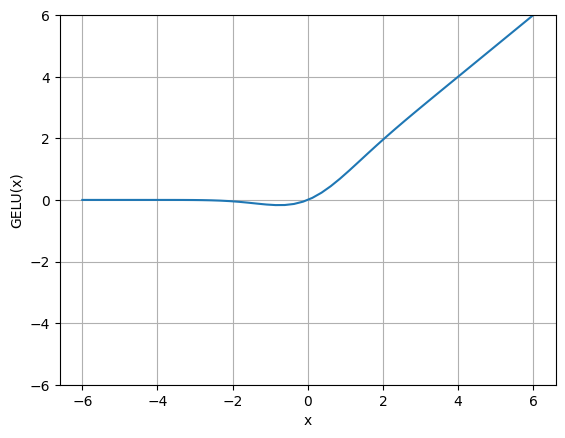

In [ ]:
import matplotlib.pyplot as plt
x=np.linspace(-6,6)
y=0.5*x*(1+np.tanh(np.sqrt(2/np.pi)*(x+0.044715*x**3)))
plt.plot(x,y)
plt.grid()
plt.ylim(-6,6)
plt.xlabel('x')
plt.ylabel('GELU(x)')
plt.show()

In [ ]:
MLP_Projection_Weights=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.0.ffwd.net.2.weight.txt')
print(MLP_Projection_Weights.shape)
print()
MLP_Projection_Bias=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.0.ffwd.net.2.bias.txt')
print(MLP_Projection_Bias.shape)
print()
MLP_Result=MLP_activation@MLP_Projection_Weights.T+MLP_Projection_Bias
print(MLP_Result.shape)

(128, 512)

(128,)

(17, 128)


In [ ]:
MLP_Residual=Attention_Residual+MLP_Result

print(MLP_Residual.shape)

(17, 128)


In [ ]:
#weights and biases for the blocks
beta1=np.zeros((n_layer,n_embd))
gamma1=np.zeros((n_layer,n_embd))
Projection_Weights=np.zeros((n_layer,n_embd,n_embd))
Projection_Bias=np.zeros((n_layer,n_embd))
beta2=np.zeros((n_layer,n_embd))
gamma2=np.zeros((n_layer,n_embd))
MLP_Weights=np.zeros((n_layer,4*n_embd,n_embd))
MLP_Bias=np.zeros((n_layer,4*n_embd))
MLP_Projection_Weights=np.zeros((n_layer,n_embd,4*n_embd))
MLP_Projection_Bias=np.zeros((n_layer,n_embd))

for n in range(n_layer):
  beta1[n]=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.'+str(n)+'.ln1.bias.txt')
  gamma1[n]=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.'+str(n)+'.ln1.weight.txt')
  Projection_Weights[n]=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.'+str(n)+'.sa.proj.weight.txt')
  Projection_Bias[n]=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.'+str(n)+'.sa.proj.bias.txt')
  beta2[n]=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.'+str(n)+'.ln2.bias.txt')
  gamma2[n]=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.'+str(n)+'.ln2.weight.txt')
  MLP_Weights[n]=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.'+str(n)+'.ffwd.net.0.weight.txt')
  MLP_Bias[n]=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.'+str(n)+'.ffwd.net.0.bias.txt')
  MLP_Projection_Weights[n]=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.'+str(n)+'.ffwd.net.2.weight.txt')
  MLP_Projection_Bias[n]=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/blocks.'+str(n)+'.ffwd.net.2.bias.txt')

In [ ]:
def Block(input,n):
  mu1=np.mean(input,axis=-1,keepdims=True)
  sigma1=np.std(input,axis=-1,keepdims=True)
  Layer_Norm1=(input-mu1)/np.sqrt(sigma1**2+eps)*gamma1[n]+beta1[n]
  Stack_V_outputs=head(Layer_Norm1,n,0)
  for k in range(1,n_head):
    V_output=head(Layer_Norm1,n,k)
    Stack_V_outputs=np.concatenate((Stack_V_outputs,V_output),axis=-1)

  Attention_Output=Stack_V_outputs@Projection_Weights[n].T+Projection_Bias[n]
  Attention_Residual=Attention_Output+input

  mu2=np.mean(Attention_Residual,axis=-1,keepdims=True)
  sigma2=np.std(Attention_Residual,axis=-1,keepdims=True)
  Layer_Norm2=(Attention_Residual-mu2)/np.sqrt(sigma2**2+eps)*gamma2[n]+beta2[n]

  MLP=Layer_Norm2@MLP_Weights[n].T+MLP_Bias[n]

  MLP_Activation=0.5*MLP*(1+np.tanh(np.sqrt(2/np.pi)*(MLP+0.044715*MLP**3))) #GELU, GaussianErrorLinearUnit

  MLP_Result=MLP_Activation@MLP_Projection_Weights[n].T+MLP_Projection_Bias[n]

  MLP_Residual=Attention_Residual+MLP_Result

  return MLP_Residual

In [ ]:
for n in range(1,n_layer):
  MLP_Residual=Block(MLP_Residual,n)

print(MLP_Residual.shape)

(17, 128)


In [ ]:
beta3=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/ln_f.bias.txt')
gamma3=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/ln_f.weight.txt')

mu3=np.mean(MLP_Residual,axis=-1,keepdims=True)
sigma3=np.std(MLP_Residual,axis=-1,keepdims=True)

Layer_Norm3=(MLP_Residual-mu3)/np.sqrt(sigma3**2+eps)*gamma3+beta3
print(Layer_Norm3.shape)

(17, 128)


In [ ]:
LM_Head_Weights=np.loadtxt('/content/drive/MyDrive/nanoGPT_parameters/lm_head.weight.txt')
print(LM_Head_Weights.shape)
print()
Logits=Layer_Norm3@LM_Head_Weights.T

print(Logits)
print()
print(Logits.shape)
print()
print(Logits[-1,:])
print()
Predictions=np.argmax(Logits,axis=-1)
print(Predictions)
print()
print(Predictions.shape)

(65, 128)

[[  1.336   3.973  -0.053  -6.838  -5.434   0.123   1.677  -0.753   1.093  -6.05    0.683   0.329  -0.256  -3.767  -4.126  -4.734  -5.367  -4.001  -5.249  -4.211  -2.093  -2.063  -5.268  -4.736  -3.548  -5.743  -4.765  -3.971  -5.629  -5.662  -4.525  -4.501  -5.159  -3.085  -5.662  -4.29   -6.67   -3.113  -3.489   1.716  -1.418  -0.428  -1.196   2.466  -0.855  -1.504   4.078   2.117  -4.294  -1.587   0.778  -0.936  -0.418   2.709  -1.78   -4.448   1.508   1.125   0.662   0.919  -3.102   0.475  -4.234   0.864  -4.069]
 [  1.827   6.109  -0.438  -6.559  -6.835   1.193   1.816   2.225   1.153  -7.204   0.629   0.545   0.357  -6.97   -6.063  -5.974  -7.451  -7.513  -5.899  -4.578  -5.7    -3.159  -6.383  -5.885  -5.718  -7.855  -7.671  -4.211  -7.001  -7.719  -5.1    -6.54   -7.475  -2.003  -7.142  -5.414  -9.141  -6.93   -6.69    0.001   0.077  -0.359   0.056   0.557   0.296   1.822  -1.232   1.034  -4.916  -0.139   1.407   2.      2.534   3.773   1.143  -5.343   3.238   0.978 

In [ ]:
rmax=np.max(Logits,axis=-1,keepdims=True)
probs=np.exp(Logits-rmax)/np.sum(np.exp(Logits-rmax),axis=-1,keepdims=True)
print(probs)
print()
print(probs.shape)
print()
print(np.sum(probs,axis=-1,keepdims=True))

[[0.02  0.274 0.005 0.    0.    0.006 0.028 0.002 0.015 0.    0.01  0.007 0.004 0.    0.    0.    0.    0.    0.    0.    0.001 0.001 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.029 0.001 0.003 0.002 0.061 0.002 0.001 0.305 0.043 0.    0.001 0.011 0.002 0.003 0.077 0.001 0.    0.023 0.016 0.01  0.013 0.    0.008 0.    0.012 0.   ]
 [0.01  0.692 0.001 0.    0.    0.005 0.009 0.014 0.005 0.    0.003 0.003 0.002 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.002 0.002 0.001 0.002 0.003 0.002 0.01  0.    0.004 0.    0.001 0.006 0.011 0.019 0.067 0.005 0.    0.039 0.004 0.002 0.054 0.001 0.018 0.    0.002 0.   ]
 [0.    0.    0.    0.    0.    0.003 0.    0.    0.    0.    0.    0.    0.    0.001 0.002 0.002 0.    0.001 0.001 0.002 0.001 0.004 0.001 0.001 0.002 0.002 0.    0.    0.001 0.    0.006 0.001 0.002 0.    0.    0.

In [ ]:
probs[-1,:]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.019, 0.   , 0.   , 0.   , 0.858, 0.   , 0.   , 0.   , 0.019, 0.   , 0.   , 0.02 , 0.   , 0.   , 0.011, 0.   , 0.   , 0.05 , 0.   , 0.   , 0.021, 0.   , 0.   , 0.   , 0.001, 0.   ])

In [ ]:
np.max(probs[-1,:])

0.857656475604664

In [ ]:
k=np.argmax(probs[-1,:])
k

43

In [ ]:
decode([k])

'e'

In [ ]:
#generate new characters
context=np.array([encode('to be or not to b')])
max_new_characters=1000
for n in range(max_new_characters):
  x=np.array(context[:,-block_size:])
  Token_Embed=token_embedding_table[x[0],:]
  positions=np.arange(0,x.shape[1],1)
  Position_Embed=position_embedding_table[positions,:]
  Input_Embed=Token_Embed+Position_Embed
  input=Input_Embed

  for n in range(0,n_layer):
    MLP_Residual=Block(input,n)
    input=MLP_Residual

  mu3=np.mean(MLP_Residual,axis=-1,keepdims=True)
  sigma3=np.std(MLP_Residual,axis=-1,keepdims=True)

  Layer_Norm3=(MLP_Residual-mu3)/np.sqrt(sigma3**2+eps)*gamma3+beta3
  Logits=Layer_Norm3@LM_Head_Weights.T

  logits=Logits[-1,:]

  #m=np.argmax(logits) #next character

  rmax=np.max(logits)
  probs=np.exp(logits-rmax)/np.sum(np.exp(logits-rmax))
  m=np.argmax(np.random.multinomial(1,probs)) #next character

  context=np.hstack((context,np.array([[m]])))

print(decode(context[0]))

to be or not to be so.

PERCUTIO:
I shall be many of this honour's mother
Than the struck and sunselves him in his deloutral see
To do remembrame his captains in earth.
Well, therefore, or your heart majesty.

ROMEO:
Put you?

ROMEO:
Sir Paris:
And what? what said there most lives are?

MERCUTIO:
Strong, most scenering strength harpour in these matter,
Of or bastardiness fliends appeared.

Nurse:
Ay, my lord, come; and fen you spake, nor conspire out a wife
Till your mother trust for me?

ROMEO:
In you, mine own two to you, now day not grow,
To length him to a dolse singly descent.

ROMEO:
Now, my gracious lady, devil, fear not a defence.

JULIET:
To see the loyal and hands to the hand I?

JULIET:
Wilt leave me honour solemn to utternd,
Which I have been him and myself's tongues
In his gage; therefore kneel doies friends, thou the commonalty.

Nurse:
Go:
Alas, briefly, now touch?

Nurse:
No, what is a sage.

JULIET:
Nor then I'll be Veno's night's reverence,
Never in the stae news of m

In [ ]:
p=np.array([0.2,0.4,0.1,0.3])
np.random.multinomial(1,p)

array([0, 1, 0, 0])

In [ ]:
N=100000
np.random.multinomial(N,p)

array([19880, 39825, 10014, 30281])